# Machine Learning Workshop


### Challenges

#### Imbalanced data

When observation in one class is higher than observation in other classes.

In [300]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt

In [285]:
# loading the data
data = pd.read_csv('data/credit-card.csv')

In [286]:
data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [287]:
# check if the data balanced
data.shape
data.Class.value_counts()

0    9000
1     492
Name: Class, dtype: int64

In [288]:
# check the number of 1s and 0s
count = data['Class'].value_counts()

print('Fraudulent "1" :', count[1])
print('Not Fraudulent "0":', count[0])

# print the percentage of question where target == 1
print(count[1]/count[0]* 100)

Fraudulent "1" : 492
Not Fraudulent "0": 9000
5.466666666666667


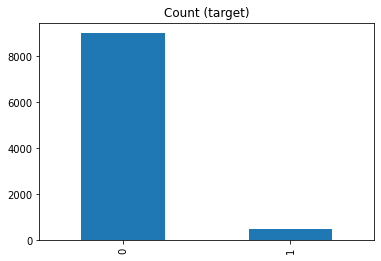

In [293]:
# plot the no of 1's and 0's
data['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

In [294]:
# check for null values
data.isnull().sum()

Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

In [295]:
# extract features and labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# check length of 1's and 0's
one = np.where(y==1)
zero = np.where(y==0)
len(one[0]), len(zero[0])

(492, 9000)

In [296]:
#split train and test sets stratify ensures that the distribution of class labels in sets are the same is y (labels).
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)

In [297]:
#decision tree classifier
clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

In [299]:
y_pred = clf_dt.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1801
           1       0.85      0.84      0.85        98

    accuracy                           0.98      1899
   macro avg       0.92      0.91      0.92      1899
weighted avg       0.98      0.98      0.98      1899



In [303]:
metrics.confusion_matrix(y_pred, y_test)

array([[1787,   16],
       [  14,   82]])

In [304]:
# ANN

# categorize labels
y_train_cat = to_categorical(y_train, num_classes= 2)
y_test_cat = to_categorical(y_test, num_classes= 2)

In [305]:
#train ANN
model_cat = Sequential()
model_cat.add(Dense(64, activation= 'sigmoid', input_shape = (X_train.shape[1],)))
model_cat.add(Dense(16, activation= 'sigmoid'))
model_cat.add(Dense(2, activation = 'sigmoid'))

model_cat.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])
model_cat.fit(X_train, y_train_cat, epochs = 100, batch_size = 64)

Epoch 1/100
119/119 [==============================] - 2s 9ms/step - loss: 0.1132 - accuracy: 0.8686
Epoch 2/100
119/119 [==============================] - 1s 9ms/step - loss: 0.0525 - accuracy: 0.9481
Epoch 3/100
119/119 [==============================] - 1s 4ms/step - loss: 0.0501 - accuracy: 0.9481
Epoch 4/100
119/119 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9481
Epoch 5/100
119/119 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9481
Epoch 6/100
119/119 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9481
Epoch 7/100
119/119 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9481
Epoch 8/100
119/119 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9481
Epoch 9/100
119/119 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9481
Epoch 10/100
119/119 [==============================] - 0s 2ms/step - loss: 0.0491 - accura

In [306]:
# Evaluation
y_pred = np.argmax(model_cat.predict(X_test), axis = 1)
print(metrics.classification_report(y_test, y_pred))

60/60 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1801
           1       0.00      0.00      0.00        98

    accuracy                           0.95      1899
   macro avg       0.47      0.50      0.49      1899
weighted avg       0.90      0.95      0.92      1899



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [308]:
print(metrics.confusion_matrix(y_pred, y_test))

[[1801   98]
 [   0    0]]


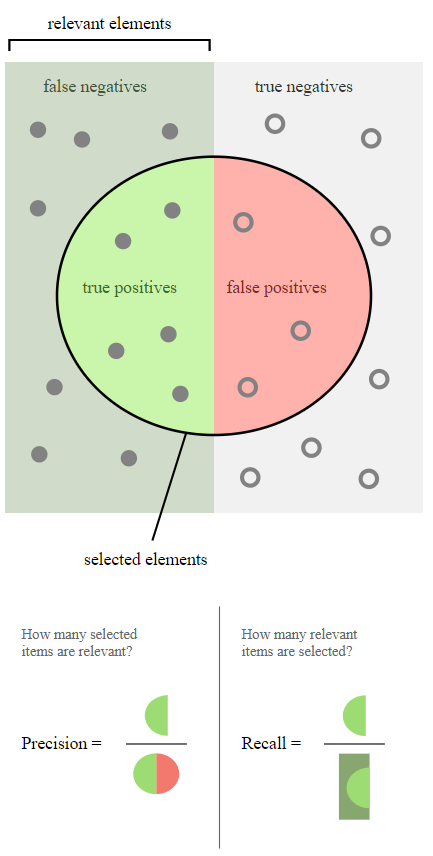

#### Handling imbalanced data

* Ignore the minority class and convert binary classification to one-class classification.
* Balancing the dataset using under-sampling and over-sampling techniques.
* Handle the problem by modifying ML algorithms or add some data modifications like representation learning

In [309]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# divie class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

In [310]:
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (9000, 32)
class 1: (492, 32)


##### Random under-sampling

total class of 1 and 0:
 0    492
1    492
Name: Class, dtype: int64


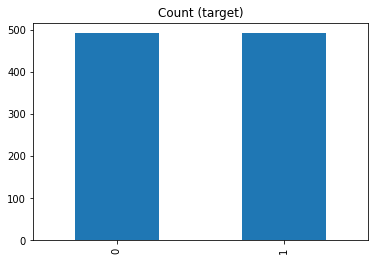

In [311]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:\n",test_under['Class'].value_counts())

test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

##### Random over-sampling

class count of 1 and 0:
 1    9000
0    9000
Name: Class, dtype: int64


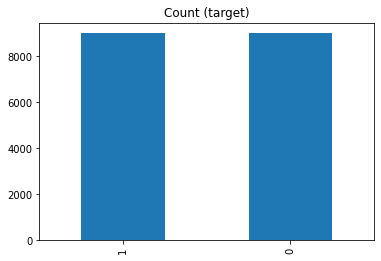

In [312]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_under = pd.concat([class_1_over, class_0], axis=0)

# print the number of class count
print('class count of 1 and 0:\n', test_under['Class'].value_counts())

# plot the count
test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

#### Balance data with imbalance learn library

In [313]:
import imblearn
imblearn.

##### Random under-sampling

In [317]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:\n', y.value_counts())
print('Resample dataset shape:\n', y_rus.value_counts())

original dataset shape:
 0    9000
1     492
Name: Class, dtype: int64
Resample dataset shape:
 0    492
1    492
Name: Class, dtype: int64


##### Random over-sampling

In [318]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_ros, y_ros = ros.fit_resample(X, y)

print('original dataset shape:\n', y.value_counts())
print('Resample dataset shape:\n', y_ros.value_counts())

original dataset shape:
 0    9000
1     492
Name: Class, dtype: int64
Resample dataset shape:
 1    9000
0    9000
Name: Class, dtype: int64


###### Synthetic minority over-sampling

In [320]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit target and predictor variable
x_smote , y_smote = smote.fit_resample(X, y)

print('original dataset shape:\n', y.value_counts())
print('Resample dataset shape:\n', y_smote.value_counts())

original dataset shape:
 0    9000
1     492
Name: Class, dtype: int64
Resample dataset shape:
 1    9000
0    9000
Name: Class, dtype: int64


In [321]:
#split train and test sets
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [322]:
#decision tree classifier
clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

In [323]:
# evaluate the model over test data
y_pred = clf_dt.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1813
           1       0.98      0.99      0.98      1787

    accuracy                           0.98      3600
   macro avg       0.98      0.98      0.98      3600
weighted avg       0.98      0.98      0.98      3600



In [324]:
metrics.confusion_matrix(y_pred, y_test)

array([[1774,   23],
       [  39, 1764]])

In [325]:
# ANN

# categorize labels
y_train_cat = to_categorical(y_train, num_classes= 2)
y_test_cat = to_categorical(y_test, num_classes= 2)

In [326]:
#train ANN
model_cat = Sequential()
model_cat.add(Dense(64, activation= 'sigmoid', input_shape = (X_train.shape[1],)))
model_cat.add(Dense(16, activation= 'sigmoid'))
model_cat.add(Dense(8, activation= 'sigmoid'))
model_cat.add(Dense(2, activation = 'sigmoid'))

model_cat.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])
model_cat.fit(X_train, y_train_cat, epochs = 100, batch_size = 64)

Epoch 1/100
225/225 [==============================] - 1s 2ms/step - loss: 0.2508 - accuracy: 0.5197
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.5405
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 0.2470 - accuracy: 0.5423
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.5471
Epoch 5/100
225/225 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.5598
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.5542
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.5522
Epoch 8/100
225/225 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.5576
Epoch 9/100
225/225 [==============================] - 0s 2ms/step - loss: 0.2448 - accuracy: 0.5443
Epoch 10/100
225/225 [==============================] - 0s 2ms/step - loss: 0.2453 - accura

In [327]:
# Evaluation
y_pred = np.argmax(model_cat.predict(X_test), axis = 1)
print(metrics.classification_report(y_test, y_pred))


113/113 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.54      0.92      0.68      1813
           1       0.71      0.21      0.32      1787

    accuracy                           0.57      3600
   macro avg       0.63      0.56      0.50      3600
weighted avg       0.63      0.57      0.50      3600



In [329]:
metrics.confusion_matrix(y_pred, y_test)

array([[1661, 1413],
       [ 152,  374]])

#### Overfitting and underfitting

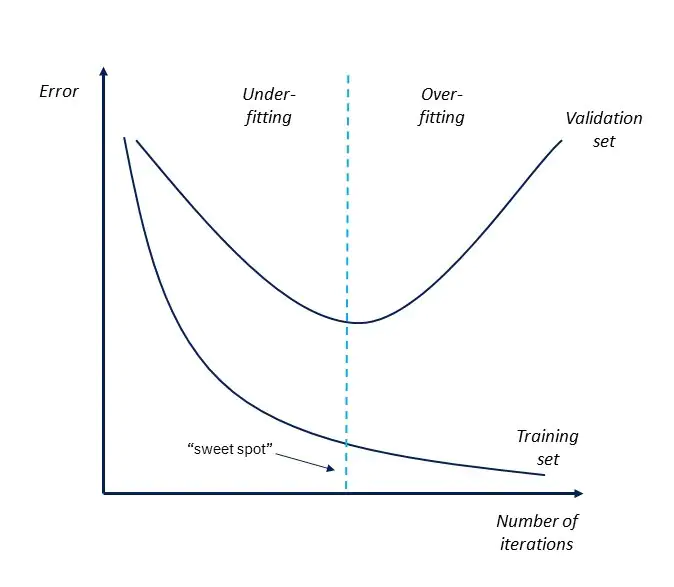

### Data modification

#### Feature selection

In [330]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


Feature: 0, Score: 0.02667
Feature: 1, Score: 0.00979
Feature: 2, Score: 0.17894
Feature: 3, Score: 0.31165
Feature: 4, Score: 0.08708
Feature: 5, Score: 0.00567
Feature: 6, Score: 0.18266
Feature: 7, Score: 0.02803
Feature: 8, Score: 0.13154
Feature: 9, Score: 0.03799


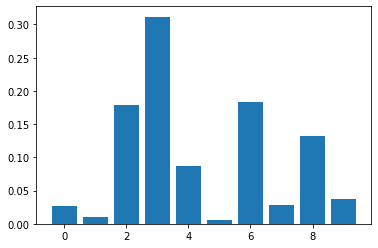

In [331]:
# decision tree for feature importance on a classification problem
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.06402
Feature: 1, Score: 0.11750
Feature: 2, Score: 0.16442
Feature: 3, Score: 0.17572
Feature: 4, Score: 0.08262
Feature: 5, Score: 0.11607
Feature: 6, Score: 0.09861
Feature: 7, Score: 0.05401
Feature: 8, Score: 0.08474
Feature: 9, Score: 0.04229


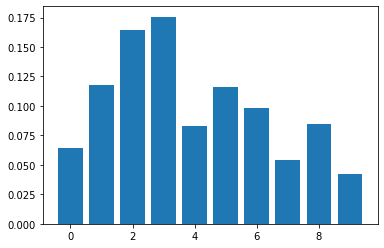

In [332]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### Feature extraction

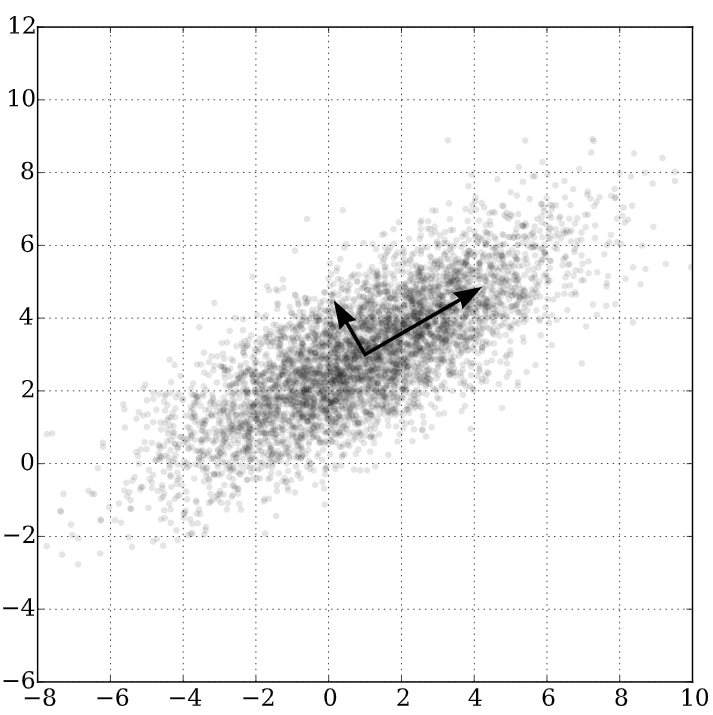

In [333]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
print(X.shape)
print(principalComponents.shape)

(1000, 10)
(1000, 2)


#### Representation learning

**Useful resources:**
* Deep learning (https://machinelearningmastery.com/)
* Tutorials:
  * https://towardsdatascience.com/
  * https://www.datacamp.com/
* YouTube channel: codebasics (https://www.youtube.com/channel/UCh9nVJoWXmFb7sLApWGcLPQ)
